# Spotify API {.unnumbered}

**Goal.** Using machine learning to predict the mood of music from song lyrics and audio features.

The following project uses Python implementation that extracts and analyzes information about songs in a Spotify playlist using the Spotify Web API. We then use the `lyricsgenius` package to search for and save the lyrics of specific songs from the Genius lyrics website. We then implement a Python script that contains several functions for cleaning song lyrics and determining the sentiment of the lyrics.


In summary, the code retrieves and cleans song lyrics, removes stopwords and performs lemmatization, and finally determines the sentiment of the lyrics using pre-trained models for sentiment analysis.




To access data from Spotify, we need to import the `spotipy` library and the `SpotifyClientCredentials` module. Additionally, we will be utilizing the pandas and IPython packages for data manipulation and display. In order to authenticate our access to the Spotify API, we must provide our **client ID** and **client secret**. Once authenticated, we can use the spotipy module to interact with the Spotify API and retrieve data.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from IPython.core.display import HTML

client_id = "xxx"
client_secret = "xxx"

In [2]:
client_id = "3899576b5fcb4c458beba2cce99aa1b6"
client_secret = "092a0b9b1e074abba82ce61ba6137aea"

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id, client_secret))


## Display Spotify Playlists


Let's take a look at the popular Spotify playlists. Below, the code retrieves a range of Spotify playlists and generates a dataframe that contains various details about each playlist, such as its name, ID, description, thumbnail image, and total number of tracks. The resulting dataframe is displayed as an HTML table, which features thumbnail images for every playlist.

In [7]:
username = "spotify"
my_playlists = sp.user_playlists(username)

In [171]:
playlist_df = []
# Loop through list of response dictionaries
for item in my_playlists["items"]:
    playlist_id = item["id"]
    playlist_name = item["name"]
    description = item["description"]
    thumbnail = item["images"][0]["url"]
    total = item["tracks"]["total"]
    playlist_df.append([thumbnail, playlist_name, playlist_id, description, total])

playlist_df = pd.DataFrame(playlist_df, columns=["thumbnail", "playlist_name", "playlist_id", "description", "total"], ).head()

# Converting links to html tags
def path_to_image_html(path):
    return f'<img src="{path}" width="40" >'

# Rendering the dataframe as HTML table
HTML(playlist_df.to_html(escape=False, formatters=dict(thumbnail=path_to_image_html)))

------------------------------------------


## Get Tracks from Playlist

This code uses Spotify's API to extract various details about songs from a given playlist. It obtains metadata such as track name, album name, and release date, as well as track features like danceability and tempo. Additionally, it collects data on the artist's genre and popularity. Once the data has been extracted, it is organized and presented in a Pandas DataFrame for easy viewing.


In [172]:
# Get playlist song features and artist info
def playlist_features(id, artist_id, playlist_id):
    
    # Create Spotify API client variables
    meta = sp.track(id)
    audio_features = sp.audio_features(id)
    artist_info = sp.artist(artist_id)
    playlist_info = sp.playlist(playlist_id)

    # Metadata
    name = meta['name']
    track_id = meta['id']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    artist_id = meta['album']['artists'][0]['id']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # Main artist name, popularity, genre
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]

    # Track features
    acousticness = audio_features[0]['acousticness']
    danceability = audio_features[0]['danceability']
    energy = audio_features[0]['energy']
    instrumentalness = audio_features[0]['instrumentalness']
    liveness = audio_features[0]['liveness']
    loudness = audio_features[0]['loudness']
    speechiness = audio_features[0]['speechiness']
    tempo = audio_features[0]['tempo']
    valence = audio_features[0]['valence']
    key = audio_features[0]['key']
    mode = audio_features[0]['mode']
    time_signature = audio_features[0]['time_signature']
    
    # Basic playlist info
    playlist_name = playlist_info['name']

    return [name, track_id, album, artist, artist_id, release_date, length, popularity, 
            artist_pop, artist_genres, acousticness, danceability, 
            energy, instrumentalness, liveness, loudness, speechiness, 
            tempo, valence, key, mode, time_signature, playlist_name]

In [173]:
def get_playlist_tracks(playlist_URI):
    tracks = []
    results = sp.playlist_tracks(playlist_URI)
    tracks = results["items"]
    while results["next"]:
        results = sp.next(results)
        tracks.extend(results["items"])
    return tracks

To analyze a particular playlist, simply copy the URL from the Spotify Player interface and input it into the following code. The `get_playlist_tracks` method retrieves a comprehensive list of track IDs and their corresponding artists from the selected playlist.


In [174]:
# Spotify playlist url
playlist_ids = []
track_ids = []
artist_uris = []

# Extract song ids and artists from playlist
playlist_URI = "37i9dQZF1DXcBWIGoYBM5M"
for i in get_playlist_tracks(playlist_URI):
    track_ids.append(i["track"]["id"])
    artist_uris.append(i["track"]["artists"][0]["uri"])
    playlist_ids.append(playlist_URI)

With the above code, it is possible to seamlessly gather essential information regarding songs and artists from any Spotify playlist identified by its URI. This process enables the extraction of data such as track IDs, artist URIs, and playlist IDs.

To extract further information about the songs, the code below iterates through each track ID in the playlist and utilizes the function we previously created. From there, we create a Pandas dataframe by passing in the extracted information and providing the desired column header names.

In [175]:
# Loop over track ids
all_tracks = [
    playlist_features(track_ids[i], artist_uris[i], playlist_ids[i])
    for i in range(len(track_ids))
]

In [13]:
# Create dataframe
df = pd.DataFrame(
    all_tracks, columns=['name', 'track_id', 'album', 'artist', 'artist_id','release_date',
                     'length', 'popularity', 'artist_pop', 'artist_genres',
                     'acousticness', 'danceability', 'energy',
                     'instrumentalness', 'liveness', 'loudness',
                     'speechiness', 'tempo', 'valence', 'key', 'mode',
                     'time_signature', 'playlist'])

df[['name', 'artist', 'release_date', 'popularity', 
    'artist_pop', 'artist_genres', 'acousticness', 
    'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 
    'tempo', 'valence', 'playlist']].head(6)

name          artist  \
0                            MELTDOWN (feat. Drake)    Travis Scott   
1  Barbie World (with Aqua) [From Barbie The Album]     Nicki Minaj   
2                                      Cruel Summer    Taylor Swift   
3                                           vampire  Olivia Rodrigo   
4           Dance The Night (From Barbie The Album)        Dua Lipa   
5                                  Enough Is Enough     Post Malone   

  release_date  popularity  artist_pop                        artist_genres  \
0   2023-07-28          92          93           [hip hop, rap, slap house]   
1   2023-06-23          94          86  [hip pop, pop, queens hip hop, rap]   
2   2019-08-23          99         100                                [pop]   
3   2023-06-30          98          84                                [pop]   
4   2023-05-25          96          86             [dance pop, pop, uk pop]   
5   2023-07-28          83          89     [dfw rap, melodic rap, pop, rap]   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0120         0.557   0.774          0.000000     0.396    -5.275   
1        0.5190         0.770   0.580          0.000127     0.233    -8.393   
2        0.1170         0.552   0.702          0.000021     0.105    -5.707   
3        0.1690         0.511   0.532          0.000000     0.311    -5.745   
4        0.0207         0.671   0.845          0.000000     0.329    -4.930   
5        0.0140         0.483   0.768          0.000000     0.109    -4.911   

   speechiness    tempo  valence           playlist  
0       0.3510  111.975    0.397  Today's Top Hits   
1       0.2470  144.072    0.753  Today's Top Hits   
2       0.1570  169.994    0.564  Today's Top Hits   
3       0.0560  137.827    0.322  Today's Top Hits   
4       0.0480  110.056    0.775  Today's Top Hits   
5       0.0344  166.061    0.332  Today's Top Hits

### Top Artist Genres


The following code segment generates a dictionary that contains the frequency of artist genres, which is then converted into a dataframe sorted by frequency. The code accomplishes this by tallying the number of occurrences of each genre in a list called `artist_genres`. The count is performed using a dictionary named `genres_dict`, and the resulting tallies are stored in a dataframe named `df_genres`, which exhibits the genres and the number of times they occur.


In [14]:
genres_dict = {}
for x in df.artist_genres:
    for ii in x:
        if ii in genres_dict:
            genres_dict[ii] += 1
        else:
            genres_dict[ii] = 1
print(genres_dict)

# Convert Dictionary to Dataframe
df_genres = pd.DataFrame(genres_dict.items(), columns=['Genre', 'Freq']).sort_values('Freq', ascending=False)
df_genres = df_genres.reset_index(drop = True)

{'hip hop': 5, 'rap': 11, 'slap house': 2, 'hip pop': 1, 'pop': 24, 'queens hip hop': 1, 'dance pop': 5, 'uk pop': 2, 'dfw rap': 2, 'melodic rap': 3, 'art pop': 2, 'electropop': 1, 'canadian contemporary r&b': 2, 'canadian pop': 2, 'k-pop': 2, 'k-pop girl group': 2, 'electra': 1, 'float house': 1, 'afrobeats': 2, 'nigerian pop': 1, 'reggaeton': 2, 'trap latino': 3, 'urbano latino': 3, 'atl hip hop': 1, 'trap': 2, 'rap canario': 1, 'r&b': 3, 'bedroom pop': 2, 'gen z singer-songwriter': 3, 'singer-songwriter pop': 2, 'chicago drill': 1, 'chicago rap': 1, 'drill': 1, 'pop rap': 1, 'big room': 2, 'edm': 3, 'pop dance': 2, 'contemporary country': 2, 'country': 1, 'colombian pop': 1, 'alternative r&b': 1, 'piano rock': 1, 'australian pop': 1, 'viral pop': 1, 'uk hip hop': 1, 'electro house': 1, 'house': 1, 'progressive house': 1, 'uk dance': 1, 'bedroom r&b': 1, 'pov: indie': 1}


In [15]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (8, 5) # Set default figure size.
plt.rc('font', family='Roboto') # Set default font family

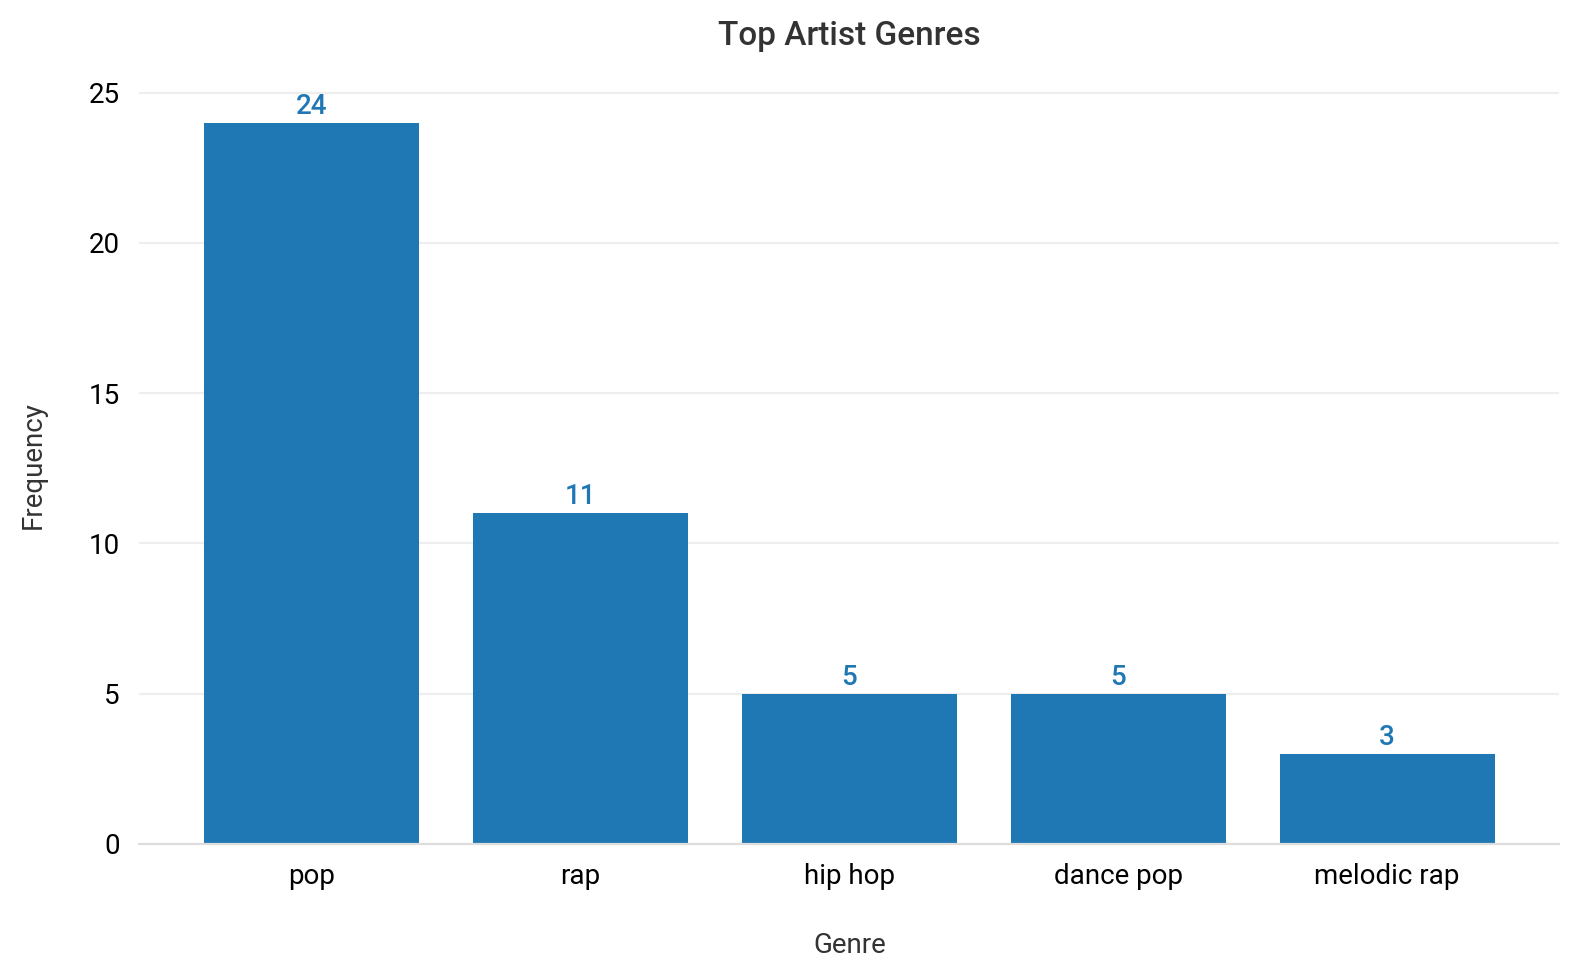

In [16]:
df_genres2 = df_genres.head()
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=df_genres2['Genre'],
    height=df_genres2['Freq'])

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title.
ax.set_xlabel('Genre', labelpad=15, color='#333333')
ax.set_ylabel('Frequency', labelpad=15, color='#333333')
ax.set_title('Top Artist Genres', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()


In [17]:
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import chart_studio.plotly as py

## convert and plot in plotly
#plotly_fig = tls.mpl_to_plotly(fig) ## convert 
#iplot(plotly_fig)

#import mpld3
#mpld3.display(fig)

-------

# Genius API


The following Python script contains various functions optimized for efficiently cleaning song lyrics and determining their sentiment. To get started, the script below imports two fundamental libraries, `lyricsgenius` and `BeautifulSoup`. Next, through the initialization of the `genius` variable, one can access the Genius API and retrieve the lyrics of any given song, such as "Too Many Nights" by Metro Boomin.


In [20]:
import lyricsgenius
from bs4 import BeautifulSoup

genius = lyricsgenius.Genius("epFCxujgBe-Y6WrkZedI8kerKxiCpR6Rh0DAHYNlKDf9B4H1nXTdZIkj7krNUHVV")
song = genius.search_song("Too Many Nights", "Metro Boomin")
# song.save_lyrics()

Searching for "Too Many Nights" by Metro Boomin...
Done.


### 1. Regex and Profanity Filter


The function provided below is designed to efficiently fetch the lyrics of a song using the given track name and artist. Once the lyrics are retrieved, the function undergoes a comprehensive cleansing process to eliminate profanity, specific characters, and patterns that may hinder the overall readability. The resulting output is a list of cleaned lyrics with all non-ASCII characters removed.

In [21]:
import re
from profanity import profanity
from better_profanity import profanity as profanity2

In [22]:
def clean_song_lyrics(song_name, song_artist):
    
    song_genius = genius.search_song(song_name, song_artist)
    clean_lyrics = song_genius.lyrics.partition('Lyrics')[2].lower()
    clean_lyrics = profanity.censor(clean_lyrics) # censored_text
    clean_lyrics = re.sub(r"[,\(\)\?\!\.\$\#\@\%]", "", clean_lyrics)
    clean_lyrics = re.sub(r"[\[].*?[\]]", "", clean_lyrics)
    clean_lyrics = re.sub(r"\d+embed", "", clean_lyrics)
    clean_lyrics = re.sub(r'\"', '', clean_lyrics)

    clean_lyrics = profanity2.censor(clean_lyrics) # censored_text
    clean_lyrics = re.sub(r"[\*]", "", clean_lyrics)
    
    clean_lyrics_decode = []
    for i in (clean_lyrics.split()):
        #encode() method
        strencode = i.encode("ascii", "ignore")
        #decode() method
        strdecode = strencode.decode()
        clean_lyrics_decode.append(strdecode)

    return clean_lyrics_decode

### 2. Removing Stop Words


The code below aims to eliminate stopwords from lyrics utilizing the `NLTK` library and its `WordNetLemmatizer` tool. This process allows for efficient lemmatization of words. The stopword list consists of frequently used English words and some contractions. Upon execution, the function returns a list of lemmatized words with the stopwords removed.


In [23]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
def remove_stopwords_lyrics(clean_lyrics_decode):
    stopword = stopwords.words('english')
    stopword.extend(["i'm", "i'll", "'ll", "i'ma"])
    removing_stopwords = [word for word in clean_lyrics_decode if word not in stopword]
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(word) for word in removing_stopwords] # lemmatized_word
    

--------------


## NLP

Subsequently, the process involves the implementation of pipeline classes to carry out predictions using models accessible in the Hub. The code imports and employs multiple transformer models specifically designed for text classification and sentiment analysis. Specifically, the following procedure creates three distinct pipelines, each equipped with different models that facilitate the assessment of emotions and sentiment in textual content.


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import transformers
from transformers import pipeline
#import tensorflow as tf
## python -m pip install "tensorflow<2.11"
# python -m pip install "protobuf<3.2"

classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
classifier2 = pipeline("text-classification",model='cardiffnlp/twitter-roberta-base-sentiment', return_all_scores=True)
classifier3 = pipeline("sentiment-analysis", return_all_scores=True)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


The `get_lyric_sentiment` function takes in pre-processed lyrics as input and produces a dictionary of sentiment scores. It leverages three distinct classifiers to calculate the scores and aggregates them into a final result. For instance, one of these classifiers is the *distilbert-base-uncased-emotion* model, specifically trained to detect "emotions in texts such as sadness, joy, love, anger, fear, and surprise".


In [28]:
def get_lyric_sentiment(cleaned_lyrics):
    
    x = ' '.join(cleaned_lyrics)
    prediction = classifier(x, truncation = True)

    song_score = {j['label']: j['score'] for j in prediction[0]}
    prediction2 = classifier2(x, truncation=True, max_length=512)
    for k in prediction2[0]:
        song_score[k['label']] = k['score']

    prediction3 = classifier3(x, truncation=True)
    for k3 in prediction3[0]:
        song_score[k3['label']] = k3['score']

    return song_score

If the lyric sequence contains more than 512 tokens, it will trigger an error message indicating an exception encountered in the 'embeddings' layer. However, we have implemented measures to properly manage lyric sequences that exceed 512 words in the function mentioned above.

---------------------


# Putting it All Together

To summarize, the code efficiently collects data and performs text analysis on every song in a playlist. Specifically, it systematically processes a list of tracks and corresponding artists while simultaneously conducting a thorough cleaning procedure on the lyrics. The cleaning process involves removing all nonessential characters, resulting in a more precise depiction of the song's content. The outcome is a comprehensive frequency analysis of each word in a song's lyrics, providing deeper insights into the overall conveyed message.

Additionally, the program computes a sentiment score for each song based on the lyrics, indicating whether the lyrics are positive, negative, or neutral. It also collects information about the song and artist, such as the release date, length, popularity, and genre. Finally, the program compiles all this information into a dataframe for further analysis.


In [30]:
lyrics_dict = {}
dict_ls = []

for i in range(len(df)):
    song_name = df['name'][i].partition(' (')[0]
    artist_name = df['artist'][i]
    track_lyrics = clean_song_lyrics(song_name, artist_name)
    track_lyrics = remove_stopwords_lyrics(track_lyrics)
    
    for k in (track_lyrics):
        if k in lyrics_dict:
            lyrics_dict[k] += 1
        else:
            lyrics_dict[k] = 1
            
    sent_score = get_lyric_sentiment(track_lyrics)
    sent_score['track_name'] = song_name
    sent_score['artist_name'] = artist_name
    sent_score['release_date'] = df['release_date'][i]
    sent_score['length'] = df['length'][i]
    sent_score['popularity'] = df['popularity'][i]
    sent_score['artist_pop'] = df['artist_pop'][i]
    sent_score['artist_genres'] = df['artist_genres'][i]
    sent_score['acousticness'] = df['acousticness'][i]
    sent_score['danceability'] = df['danceability'][i]
    sent_score['energy'] = df['energy'][i]
    sent_score['instrumentalness'] = df['instrumentalness'][i]
    sent_score['liveness'] = df['liveness'][i]
    sent_score['loudness'] = df['loudness'][i]
    sent_score['speechiness'] = df['speechiness'][i]
    sent_score['tempo'] = df['tempo'][i]
    sent_score['valence'] = df['valence'][i]
    
    dict_ls.append(sent_score)

Searching for "MELTDOWN" by Travis Scott...
Done.
Searching for "Barbie World" by Nicki Minaj...
Done.
Searching for "Cruel Summer" by Taylor Swift...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "Dance The Night" by Dua Lipa...
Done.
Searching for "Enough Is Enough" by Post Malone...
Done.
Searching for "What Was I Made For? [From The Motion Picture "Barbie"]" by Billie Eilish...
Done.
Searching for "Popular" by The Weeknd...
Done.
Searching for "Super Shy" by NewJeans...
Done.
Searching for "Paint The Town Red" by Doja Cat...
Done.
Searching for "K-POP" by Travis Scott...
Done.
Searching for "Seven" by Jung Kook...
Done.
Searching for "(It Goes Like) Nanana - Edit" by Peggy Gou...
Done.
Searching for "Calm Down" by Rema...
Done.
Searching for "LALA" by Myke Towers...
Done.
Searching for "Flowers" by Miley Cyrus...
Done.
Searching for "Chemical" by Post Malone...
Done.
Searching for "fukumean" by Gunna...
Done.
Searching for "Columbia" by Quevedo...
Done.
Sea

In [170]:
df_final = pd.DataFrame(dict_ls)
df_final = df_final[['track_name', 'artist_name', 'release_date', 'length', 'popularity', 
         'artist_pop', 'artist_genres', 'acousticness', 'danceability', 'energy',
         'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
         'sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'LABEL_0',
         'LABEL_1', 'LABEL_2', 'NEGATIVE', 'POSITIVE']]

# df_final.to_csv("static/data/top_songs_us.csv", index=False)

In [32]:
df_final.head(3)

track_name   artist_name release_date  length  popularity  artist_pop  \
0      MELTDOWN  Travis Scott   2023-07-28  246133          92          93   
1  Barbie World   Nicki Minaj   2023-06-23  109750          94          86   
2  Cruel Summer  Taylor Swift   2019-08-23  178426          99         100   

                         artist_genres  acousticness  danceability  energy  \
0           [hip hop, rap, slap house]         0.012         0.557   0.774   
1  [hip pop, pop, queens hip hop, rap]         0.519         0.770   0.580   
2                                [pop]         0.117         0.552   0.702   

   ...       joy      love     anger      fear  surprise   LABEL_0   LABEL_1  \
0  ...  0.099706  0.003778  0.318775  0.510471  0.005726  0.304234  0.609486   
1  ...  0.643529  0.011229  0.216599  0.051564  0.006760  0.304938  0.641082   
2  ...  0.237114  0.017189  0.406948  0.024178  0.003635  0.285380  0.609290   

    LABEL_2  NEGATIVE  POSITIVE  
0  0.086280  0.988320  0.011679  
1  0.053980  0.996903  0.003097  
2  0.105329  0.994155  0.005845  

[3 rows x 27 columns]

In summary, the above code aims to collect and refine song lyrics by eliminating stopwords and conducting lemmatization. Subsequently, it employs pre-trained models for sentiment analysis to determine the prevailing emotion conveyed in the lyrics, providing valuable insights into the overall tone and message of the song.




### Visualizing the Data

Our next step involves visually representing the distribution of different track features, such as song popularity. To achieve this, we generate a histogram using the powerful `matplotlib` and `seaborn` libraries. The figure includes an informative title and labels. We color the histogram with $n$ bins to accurately represent the popularity distribution. Finally, we present the histogram using the `plt.show()` function.


In [33]:
## Set Default Plot Chart Style Configurations
from IPython.display import set_matplotlib_formats
import seaborn as sns

pd.set_option('display.max_colwidth', None)
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=.5, rc={"grid.linewidth": 0.6})
sns.set_style({'font.family': 'Roboto'})


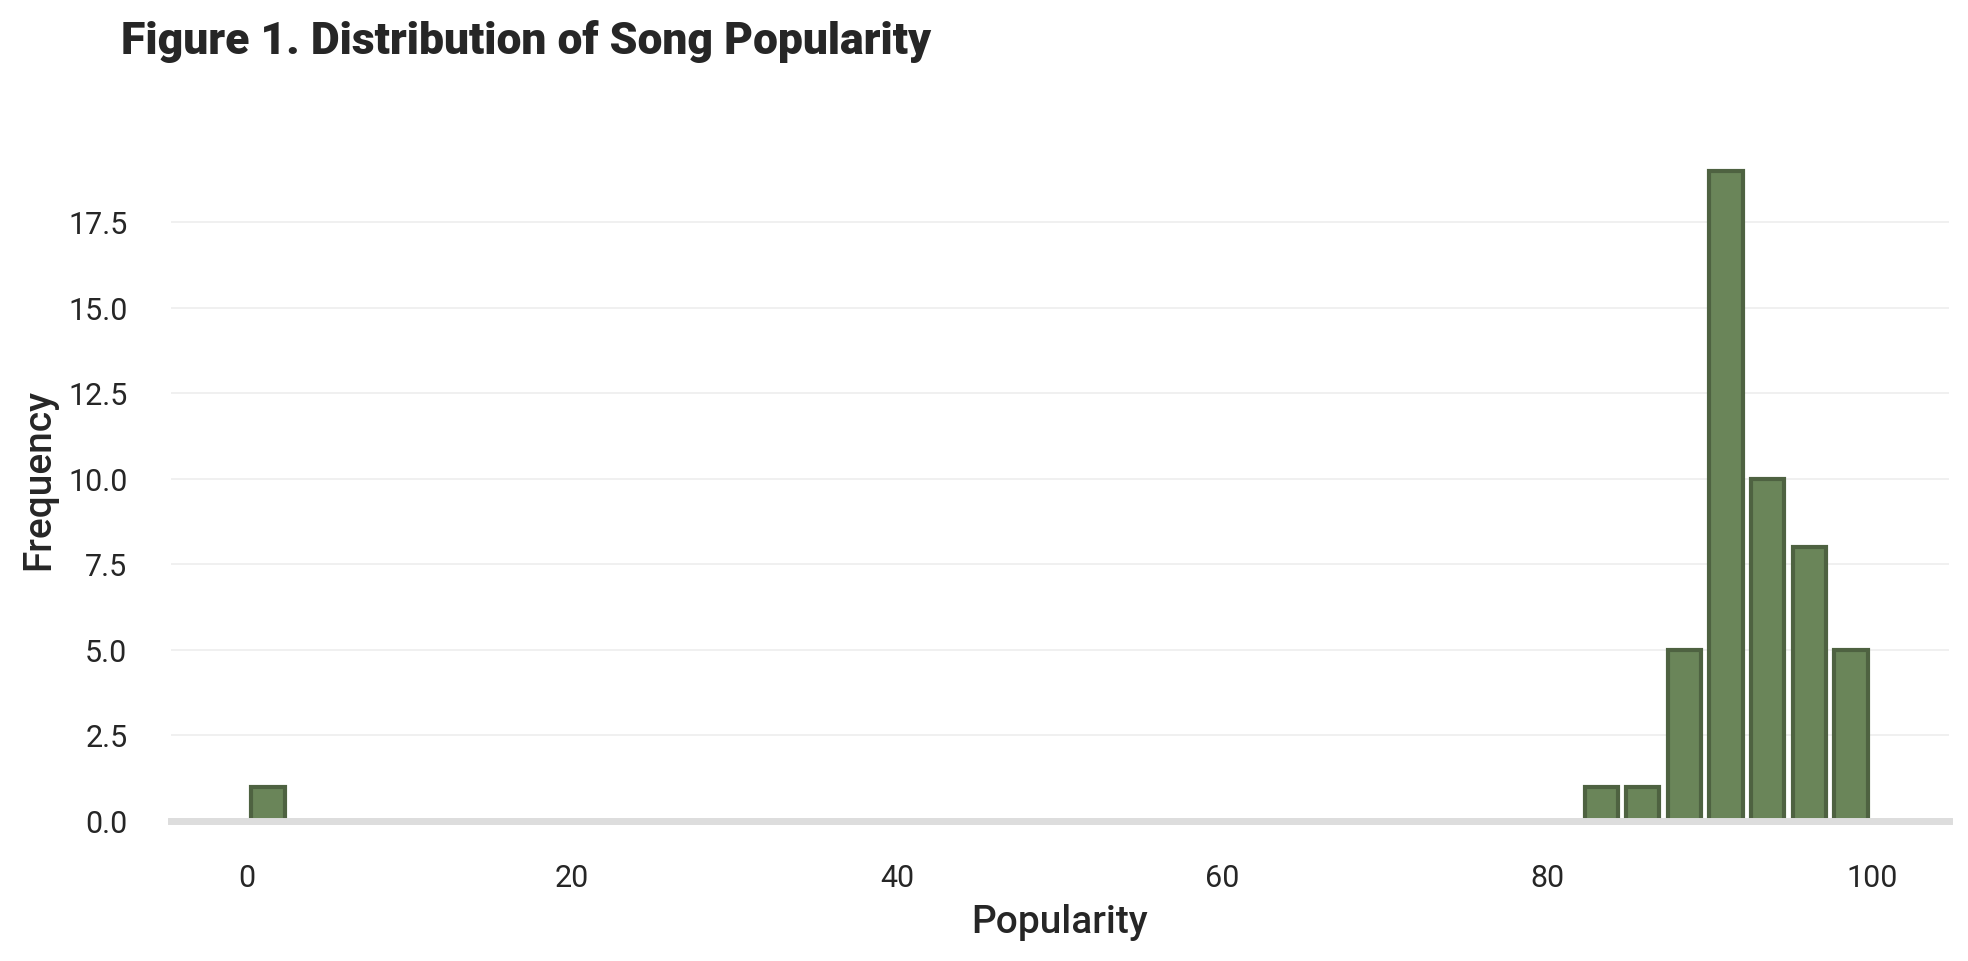

In [117]:
fig_hist = plt.figure(figsize = (10,5), dpi =100)
plt.title("Figure 1. Distribution of Song Popularity", weight='heavy',y =1.1, x=0.2).set_fontsize('16')
z = sns.histplot(data=df_final, x="popularity", color="#6A8559", alpha = 1.0, edgecolor="#4E6241", linewidth=1.5, shrink=.8)
sns.despine(left=True, bottom=False)
z.spines['bottom'].set_color('#DDDDDD')
z.yaxis.grid(True, color='#EEEEEE')
z.xaxis.grid(False)
plt.xlabel("Popularity", size=14, weight=500)
plt.ylabel("Frequency", size=14, weight=500)
plt.tight_layout()
# plt.savefig("static/images/hold_times_dist.png", format="png", dpi=1200)
plt.show()

In [ ]:
#plotly_fig2 = tls.mpl_to_plotly(fig_hist) ## convert 
#iplot(plotly_fig2)

#### Twitter-roBERTa-base for Sentiment Analysis

Now, we present a graphical representation of the results obtained from the *roBERTa-base* model "trained on roughly 58 million tweets and fine-tuned for sentiment analysis using the TweetEval benchmark" (EMNLP 2020). According to the **TweetEval** reference paper and official Github repository, the resulting labels `0`, `1`, and `2` correspond to Negative, Neutral, and Positive, respectively.

- *Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive*

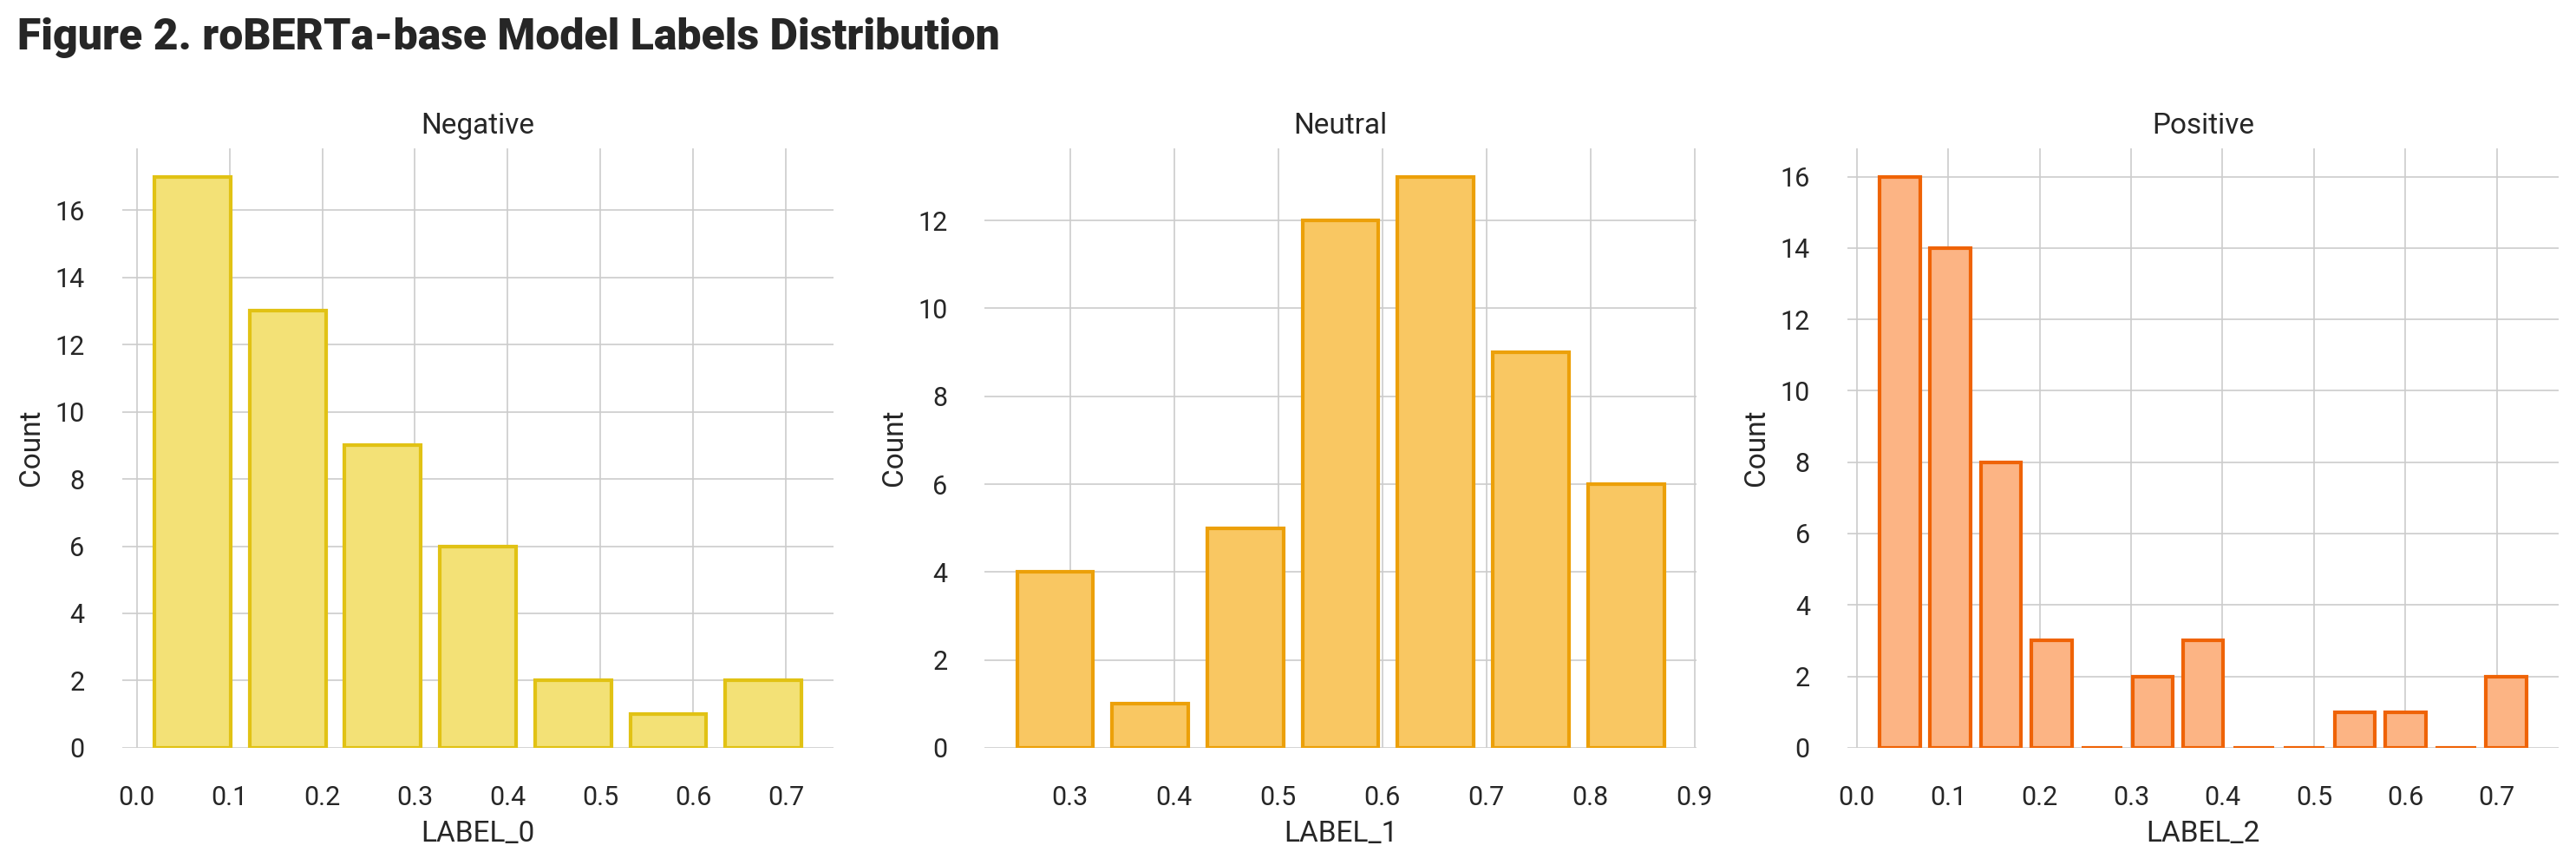

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Figure 2. roBERTa-base Model Labels Distribution", weight="heavy", y=0.99, x=0.2).set_fontsize("18")

sns.histplot(data=df_final, x=df_final[df_final["LABEL_0"].notnull()]["LABEL_0"], color="#F3E176", alpha=1.0, ax=axs[0], edgecolor="#E1C214", linewidth=1.5, shrink=.8)
axs[0].set_title("Negative")
sns.histplot(data=df_final, x=df_final[df_final["LABEL_1"].notnull()]["LABEL_1"], color="#F9C762", alpha=1.0, ax=axs[1], edgecolor="#ECA009", linewidth=1.5, shrink=.8)
axs[1].set_title("Neutral")
sns.histplot(data=df_final, x=df_final[df_final["LABEL_2"].notnull()]["LABEL_2"], color="#FCB484", alpha=1.0, ax=axs[2], edgecolor="#EF6306", linewidth=1.5, shrink=.8)
axs[2].set_title("Positive")

sns.despine(left=True, bottom=True)
fig.tight_layout()
# plt.savefig("static/images/brand_dist.png", format="png", dpi=1200)
plt.show()

This code above creates a histogram that displays the distribution of labels for a roBERTa-base model. The labels are categorized as negative, neutral, or positive, with each having its own distinct color. Additionally, the code adds a title to the figure and resizes the subplots to ensure a better fit. The final output is a graph that can be saved in png format for future reference.

### Correlations Matrix

After completing the initial data analysis, we proceed with generating the Pearson correlations matrix using the Pandas command `df.corr()`. Subsequently, we visualize the matrix using the seaborn heatmap, providing a detailed understanding of the relationships between the various variables in our dataset.


In [124]:
track_sentiment_df = df_final[['track_name', 'artist_name',
           'acousticness', 'danceability', 'energy', 'instrumentalness', 
           'loudness', 'speechiness', 'tempo', 'valence', 
           'sadness', 'joy', 'love', 'anger', 'fear', 'surprise',
           'LABEL_0', 'LABEL_1', 'LABEL_2', 'NEGATIVE', 'POSITIVE']]

# Find the pearson correlations matrix
corr = track_sentiment_df.corr(method = 'pearson')

In [139]:

plt.figure(figsize=(10,8), dpi =600)
g = sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5, annot_kws={"size": 8}, cbar_kws={"shrink": .25})

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 9,family='Roboto')
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 9,family='Roboto')
plt.title('Sentiment Analysis Model Labels Correlation Matrix')

# plt.savefig('static/images/heatmap.png')              
plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize=(10,6))
#sns.heatmap(corr, center=0, cmap='Blues')
#ax.set_title('Multi-Collinearity of Lyric NLP Sentiment Analysis')


The code below produces a scatterplot that showcases the correlation between energy and fear. The x-axis represents the energy value, while the y-axis represents the fear sentiment. The size of each data point corresponds to the label indicating the neutral sentiment level, and its color represents the valence value. Moreover, each bubble contains its energy value within, allowing for a straightforward interpretation of the data.


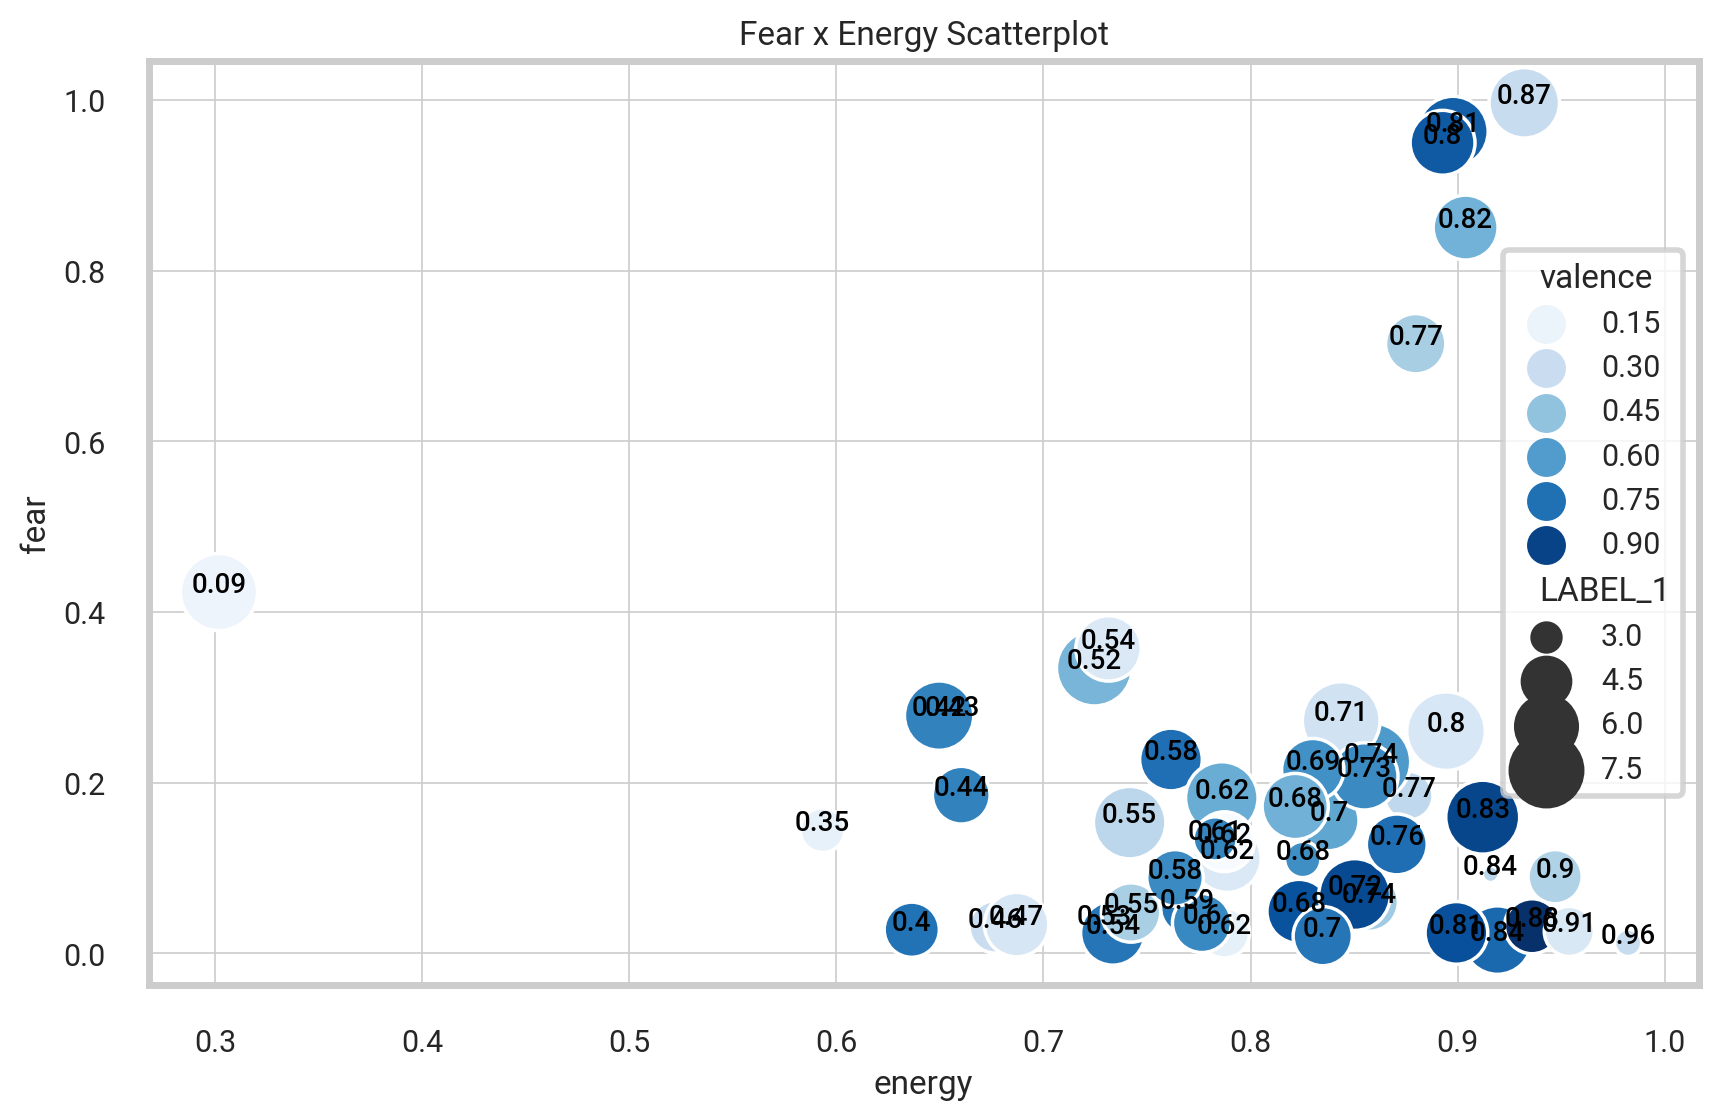

In [148]:
fig = plt.figure(figsize = (10,6), dpi=100)
# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(x=track_sentiment_df['energy']**0.5, y=track_sentiment_df['fear']**0.5,
               size=track_sentiment_df['LABEL_1']*10, hue=track_sentiment_df['valence'],
               sizes=(20,800),
               palette='Blues')
#For each point, we add a text inside the bubble
for line in range(0,track_sentiment_df.shape[0]):
     ax.text(track_sentiment_df.energy[line]**0.5, track_sentiment_df.fear[line]**0.5, 
             round(track_sentiment_df.energy[line], 2), 
             horizontalalignment='center', size='small', color='black', weight='semibold')
        
plt.title('Fear x Energy Scatterplot')
#plt.savefig(title, dpi=400)
plt.show()

Text(0.5, 1.0, 'Fear vs. Energy')

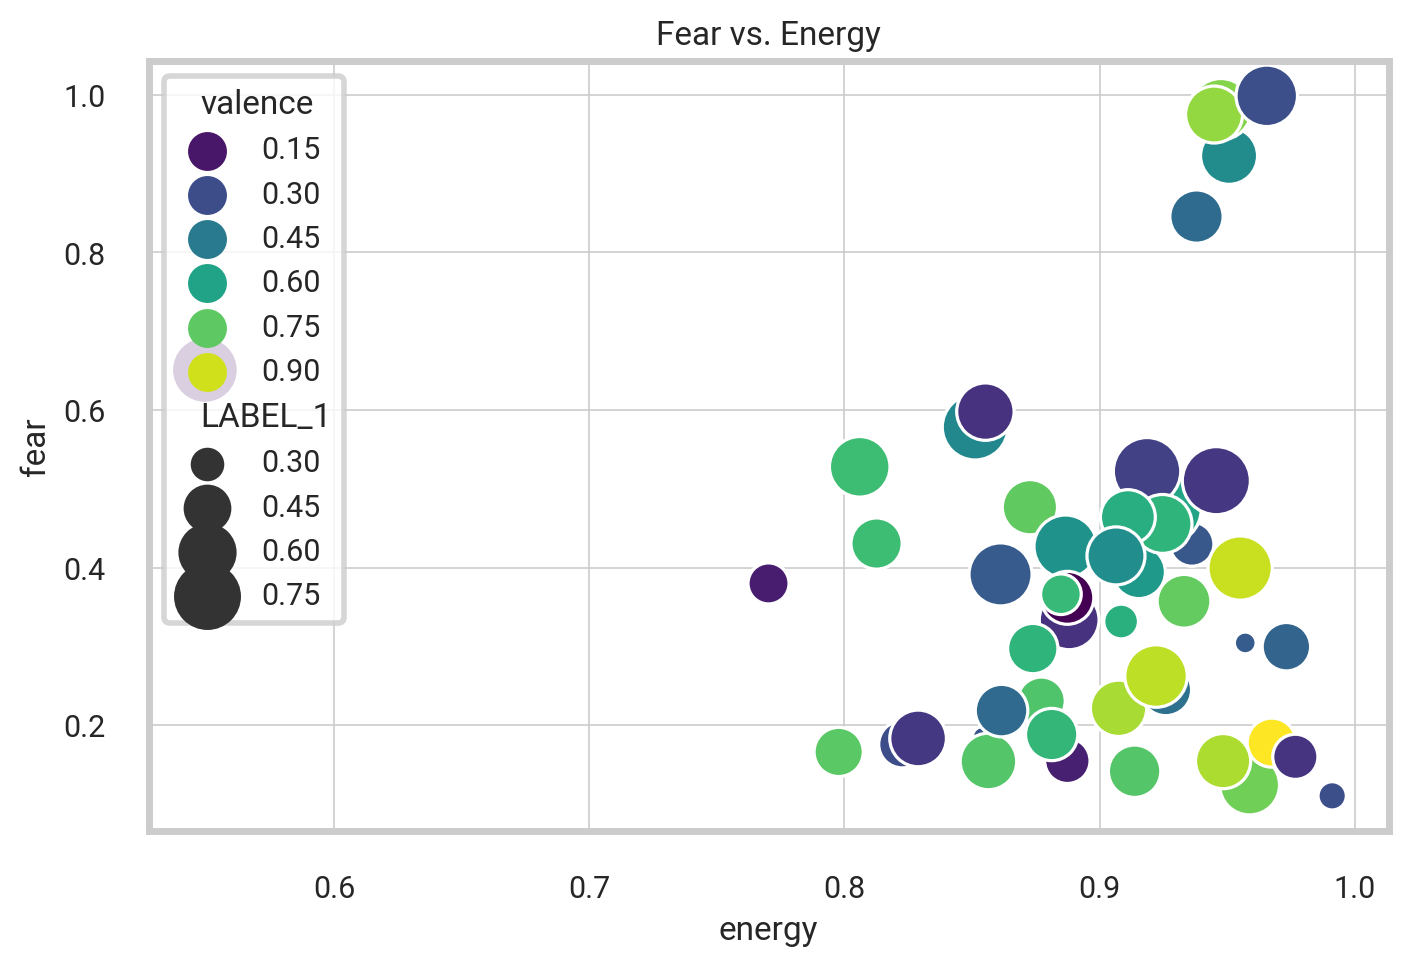

In [147]:
#fig = plt.figure(figsize = (10,6), dpi=800)
# Create scatterplot. alpha controls the opacity and s controls the size.
plot = sns.scatterplot(x = track_sentiment_df['energy']**0.25, 
                       y = track_sentiment_df['fear']**0.25,
                       hue = track_sentiment_df['valence'],
                       size = track_sentiment_df['LABEL_1'],
                       sizes = (50, 600),
                       size_order = track_sentiment_df['LABEL_1'],
                       palette = 'viridis')
plot.set_title('Fear vs. Energy')


Similarly, the scatterplot presented above utilizes the track sentiment data, comparing the energy and fear levels of the tracks based on valence and size.

------

### PCA Analysis

Next, we implement principal component analysis (PCA) on a comprehensive dataset comprising a range of musical features.

First, we create a table from the `df_final` dataframe by extracting specific columns that facilitate our analysis. These columns consist of acousticness, danceability, energy, speechiness, tempo, and valence of each track, as well as emotional features such as sadness, joy, love, anger, fear, and surprise. In addition, the table includes the track name and flags for both negative and positive sentiments.

We then perform PCA on the data in the table and apply it to generate a biplot depicting the relationship between the features and tracks. This biplot quickly reveals any discernible patterns and clusters within the dataset.


In [163]:

X_SMALL = df_final[['acousticness', 'danceability', 'energy', 'speechiness', 
                    'tempo', 'valence', 'sadness', 'joy', 'love', 'anger', 
                    'fear', 'surprise', 'track_name', 'NEGATIVE', 'POSITIVE']]

To process the data, the code employs the **PCA** and **StandardScaler** modules from the `sklearn` *decomposition* and *preprocessing* libraries. Specifically, the $X_i$ variable is used to choose the first 12 columns from the subset of data mentioned above, while the track_name column is chosen as the target variable. Next, the StandardScaler standardizes the $X_i$ data.

PCA is applied to the standardized data, $X_{st}$, using the PCA module, and the resulting loadings and eigenvalues are saved.

In [164]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster

X_i = X_SMALL.iloc[:,0:12]
target = X_SMALL['track_name'].to_numpy()
X_st =  StandardScaler().fit_transform(X_i)
pca_out = PCA().fit(X_st)

# component loadings
loadings = pca_out.components_

# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([2.42892453e+00, 1.97821004e+00, 1.55977717e+00, 1.45952571e+00,
       1.17443158e+00, 1.01165619e+00, 8.35334613e-01, 7.33934785e-01,
       5.23903936e-01, 3.61072998e-01, 1.78126406e-01, 7.48526015e-15])

Next, the following code uses the `PCA()` function to calculate the PCA scores of the standardized data set, $X_{st}$. 

A biplot is generated using the cluster module from the bioinfokit library. The biplot is based on the PCA scores and loadings, and the column names of the $X_i$ data frame are used as labels for the plot. The variance explained by the first two principal components are also displayed on the plot.


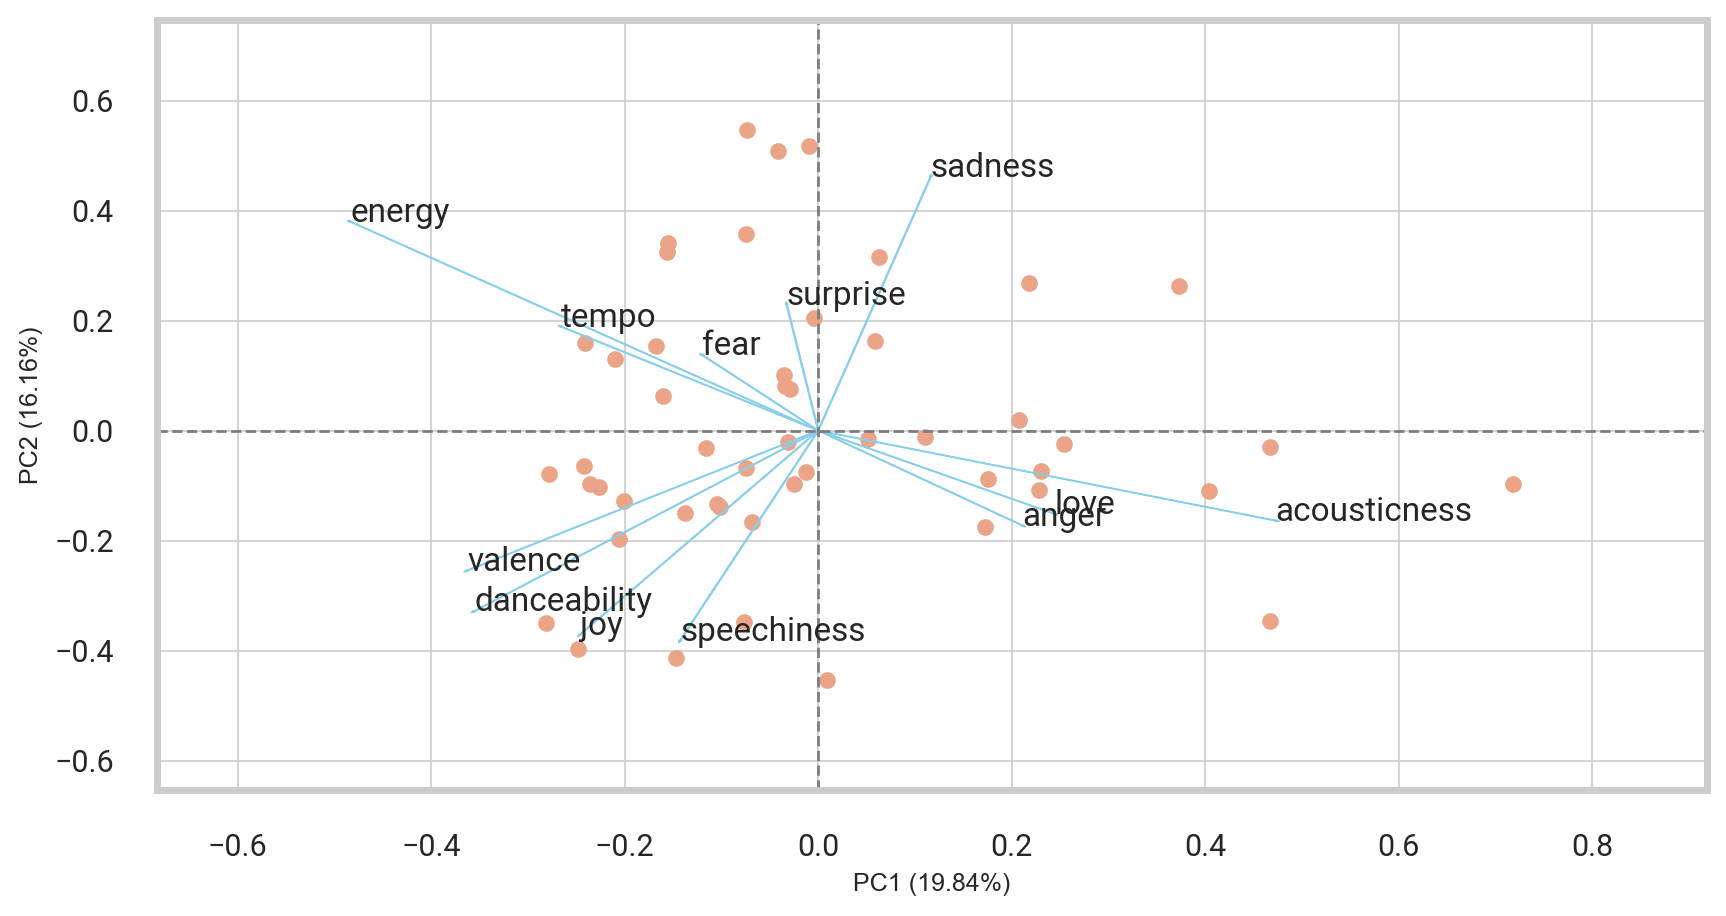

In [165]:
# get biplot
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X_i.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2), #colorlist=target,
               show=True,dim=(10,5),dotsize=16)



Then, I assigned the resulting column names to the variable `cols_pca` using a list comprehension. Using the PCA scores, column names, and the original index from $X_i$, I created a new pandas DataFrame called `df_pca`. The first three rows of this new DataFrame is shown below.

In [166]:
#pca = PCA()
pca_scores = PCA().fit_transform(X_st)
cols_pca = [f'PC{i}' for i in range(1, pca_out.n_components_+1)]
df_pca = pd.DataFrame(pca_scores, columns=cols_pca, index=X_i.index)

In [167]:
df_pca.head(3)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.529881 -0.405733  3.163332  1.729479  0.211702 -0.201977 -0.268700   
1 -0.546332 -2.065750  0.690890  0.511964 -0.253262  0.406501  1.478151   
2 -0.208698  0.449729  1.019382  1.602302 -0.691681  0.559411  1.445747   

        PC8       PC9      PC10      PC11          PC12  
0 -0.178874 -1.132783  2.410575  0.463887 -1.919207e-08  
1  0.712882 -0.789191  0.166014  0.629793  3.851750e-08  
2 -0.580528  0.497472  0.397263 -0.218190  1.989878e-07

The variance ratios for the PCA output and the cumulative sum of the explained variance ratios are printed below. Specifically, the array displayed represents the amount of variability explained by each component.

In [168]:
print(pca_out.explained_variance_ratio_)
print('----')
print(pca_out.explained_variance_ratio_.cumsum())

[1.98362170e-01 1.61553820e-01 1.27381802e-01 1.19194600e-01
 9.59119124e-02 8.26185890e-02 6.82189934e-02 5.99380074e-02
 4.27854881e-02 2.94876281e-02 1.45469899e-02 6.11296246e-16]
----
[0.19836217 0.35991599 0.48729779 0.60649239 0.7024043  0.78502289
 0.85324189 0.91317989 0.95596538 0.98545301 1.         1.        ]



The loading vectors help visualize the relationship between the original variables and their respective components. These vectors represent the weights of the variables within a mathematical equation used to generate the principal components.

In [169]:
df_weights = pd.DataFrame(pca_out.components_.T, columns=df_pca.columns, index=X_i.columns)
df_weights

PC1       PC2       PC3       PC4       PC5       PC6  \
acousticness  0.472656 -0.163735 -0.154089 -0.139990  0.158485 -0.194553   
danceability -0.355574 -0.328415  0.225089 -0.331764 -0.051070  0.160021   
energy       -0.483531  0.379662  0.071901 -0.059144 -0.000970 -0.006760   
speechiness  -0.142772 -0.381637  0.424084  0.255572 -0.142908  0.231525   
tempo        -0.265554  0.188921 -0.110072  0.379782  0.120769  0.170145   
valence      -0.362767 -0.254400 -0.012113 -0.293288  0.108810  0.073154   
sadness       0.116296  0.461910  0.134566 -0.367065 -0.447636  0.172327   
joy          -0.246167 -0.370909 -0.562805  0.120775 -0.138803 -0.200699   
love          0.244360 -0.151565  0.029492 -0.228710  0.455959  0.608229   
anger         0.211241 -0.172776  0.447945  0.433599 -0.260744 -0.063045   
fear         -0.119738  0.137196  0.396863 -0.009660  0.609067 -0.491055   
surprise     -0.032613  0.229246 -0.185551  0.426070  0.242759  0.404430   

                   PC7       PC8       PC9      PC10      PC11          PC12  
acousticness  0.439747  0.280886 -0.091090 -0.125600  0.589179 -4.943714e-09  
danceability -0.167495  0.124112 -0.207131 -0.688556  0.127638 -7.809908e-09  
energy       -0.076220 -0.152039  0.260448  0.161720  0.700306 -3.745673e-08  
speechiness   0.156661  0.056942 -0.470160  0.482825  0.181172 -1.361384e-08  
tempo         0.679307 -0.297284 -0.121784 -0.343322 -0.106622  2.094270e-08  
valence       0.409577  0.421362  0.491322  0.239508 -0.237202  6.650702e-09  
sadness       0.213354  0.153210 -0.185808  0.027784 -0.094723  5.262447e-01  
joy          -0.095438 -0.113271 -0.073615  0.064269  0.074527  6.114759e-01  
love         -0.057160 -0.396488  0.154501  0.081748  0.066410  3.014358e-01  
anger         0.011700 -0.003942  0.552239 -0.239420  0.079505  3.100606e-01  
fear         -0.018711  0.058817 -0.180386  0.017061 -0.128632  3.794241e-01  
surprise     -0.246216  0.645318 -0.048646 -0.080059  0.062357  1.349076e-01

--------------

## Spotify Songs - Similarity Search




Below, we create a query to retrieve similar elements based on Euclidean distance. In mathematics, the Euclidean distance between two points is the length of the line segment between the two points. In this sense, the closer the distance is to 0, the more similar the songs are.



#### [KNN Algorithm](https://www.kaggle.com/code/leomauro/spotify-songs-similarity-search/notebook)


The k-Nearest Neighbors (KNN) algorithm searches for k similar elements based on a query point at the center within a predefined radius. 



In [156]:
# Get a song string search
def getMusicName(elem):
    return f"{elem['artist']} - {elem['name']}"

def knnQuery(queryPoint, arrCharactPoints, k):
    queryVals = queryPoint.tolist()
    distVals = []
    
    # Copy of dataframe indices and data
    tmp = arrCharactPoints.copy(deep = True)  
    for index, row in tmp.iterrows():
        feat = row.values.tolist()
        
        # Calculate sum of squared differences
        ssd = sum(abs(feat[i] - queryVals[i]) ** 2 for i in range(len(queryVals)))
        
        # Get euclidean distance
        distVals.append(ssd ** 0.5)
        
    tmp['distance'] = distVals
    tmp = tmp.sort_values('distance')
    
    # K closest and furthest points
    return tmp.head(k).index, tmp.tail(k).index


# Execute KNN removing the query point
def querySimilars(df, columns, idx, func, param):
    arr = df[columns].copy(deep = True)
    queryPoint = arr.loc[idx]
    arr = arr.drop([idx])
    return func(queryPoint, arr, param)

**KNN Query Example.** 

Our function allows us to create personalized query points and modify the columns to explore other options. For example, the following code selects a specific set of song attributes and then searches for the $k$ highest values of these attributes set equal to one.

Let's search for  $k=3$  similar songs to a query point $\textrm{songIndex} = 6$. 

In [157]:
from sklearn import preprocessing 

scaler=preprocessing.MinMaxScaler() #instantiate a scaler
# all the feature values are in the range [0,1] ,except of loudnes
# so let's scale it to fit the exact same range
loudness2 = df["loudness"].values
loudness_scaled=scaler.fit_transform(loudness2.reshape(-1, 1))
df['loudness_scaled'] = loudness_scaled

In [158]:
# Select song and column attributes
songIndex = 4 # query point
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
           'loudness_scaled', 'tempo', 
           'speechiness', 'valence']

# Set query parameters
func, param = knnQuery,3

# Implement query
response = querySimilars(df, columns, songIndex, func, param)

print("---- Query Point ----")
print(getMusicName(df.loc[songIndex]))
print('---- k = 3 similar songs ----')
for track_id in response[0]:
    track_name = getMusicName(df.loc[track_id])
    print(track_name)
print('---- k = 3 nonsimilar songs ----')
for track_id in response[1]:
    track_name = getMusicName(df.loc[track_id])
    print(track_name)

---- Query Point ----
Dua Lipa - Dance The Night (From Barbie The Album)
---- k = 3 similar songs ----
Travis Scott - MELTDOWN (feat. Drake)
Noah Kahan - Dial Drunk (with Post Malone)
Rema - Calm Down (with Selena Gomez)
---- k = 3 nonsimilar songs ----
Doechii - What It Is (Solo Version)
Harry Styles - As It Was
Morgan Wallen - Last Night


The code below implements the same idea as above, but queries each track in a given playlist instead of a single defined query point.

In [159]:
similar_count = {} # Similar songs count
nonsimilar_count = {} # Non-similar songs count

for track_index in df.index:
    # Implement query
    response = querySimilars(df, columns, track_index, func, param)
    
    # Get similar songs
    for similar_index in response[0]:
        track = getMusicName(df.loc[similar_index])
        if track in similar_count:
            similar_count[track] += 1
        else:
            similar_count[track] = 1
    
    # Get non-similar songs
    for nonsimilar_index in response[1]:
        track = getMusicName(df.loc[nonsimilar_index])
        if track in nonsimilar_count:
            nonsimilar_count[track] += 1
        else:
            nonsimilar_count[track] = 1

In [160]:
nonsimilar = dict(sorted(nonsimilar_count.items(), key=lambda item: item[1], reverse=True))
print('---- NON SIMILAR SONG COUNTS ----')
for track_name, track_count in nonsimilar.items():
    if track_count >= 8:
        print(track_name, ':', track_count)

similar = dict(sorted(similar_count.items(), key=lambda item: item[1], reverse=True))
print('\n---- SIMILAR SONG COUNTS ----')
for track_name, track_count in similar.items():
    if track_count >= 5:
        print(track_name, ':', track_count)

---- NON SIMILAR SONG COUNTS ----
Morgan Wallen - Last Night : 38
The Weeknd - Die For You - Remix : 31
Billie Eilish - What Was I Made For? [From The Motion Picture "Barbie"] : 26
Harry Styles - As It Was : 24
Doechii - What It Is (Solo Version) : 19
Laufey - From The Start : 12

---- SIMILAR SONG COUNTS ----
Lil Durk - All My Life (feat. J. Cole) : 5
Doechii - What It Is (Solo Version) : 5
OneRepublic - I Ain't Worried : 5
Taylor Swift - Cruel Summer : 5
SZA - Kill Bill : 5
Doja Cat - Paint The Town Red : 5
Quevedo - Columbia : 5
Gunna - fukumean : 5
Sam Smith - Unholy (feat. Kim Petras) : 5


----------------------

## Organized Songs in a Playlist

In [161]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, decomposition

In [162]:
songs = df[['name','acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'speechiness', 'tempo', 'valence',  'loudness_scaled']]
songs.describe()



acousticness  danceability     energy  instrumentalness   liveness  \
count     50.000000     50.000000  50.000000         50.000000  50.000000   
mean       0.250266      0.664640   0.657402          0.021944   0.181618   
std        0.257309      0.117373   0.169266          0.094434   0.133191   
min        0.001260      0.444000   0.091100          0.000000   0.032200   
25%        0.053300      0.559500   0.550250          0.000000   0.097025   
50%        0.146500      0.667500   0.679500          0.000004   0.114500   
75%        0.408250      0.741500   0.791250          0.000128   0.244250   
max        0.959000      0.916000   0.965000          0.629000   0.671000   

       speechiness       tempo    valence  loudness_scaled  
count    50.000000   50.000000  50.000000        50.000000  
mean      0.080130  125.693800   0.520218         0.779203  
std       0.074653   27.465254   0.240977         0.161298  
min       0.025400   66.900000   0.096900         0.000000  
25%       0.035325  102.642250   0.310000         0.708313  
50%       0.051600  127.992000   0.526500         0.823084  
75%       0.083150  140.853000   0.730500         0.866962  
max       0.351000  203.853000   0.964000         1.000000

In [ ]:
labels = songs.values[:,0]
X = songs.values[:,1:10]
kmeans = cluster.AffinityPropagation(preference=-200)
kmeans.fit(X)

AffinityPropagation(preference=-200)

In [ ]:
predictions = {}
for p,n in zip(kmeans.predict(X),labels):
    if not predictions.get(p):
        predictions[p] = []
        
    predictions[p] += [n]

for p in predictions:
    print("Category",p)
    print("-----")
    for n in predictions[p]:
        print(n)
    print("")

Category 0
-----
What Was I Made For? [From The Motion Picture "Barbie"]
Kill Bill
Attention
LALA
Karma

Category 4
-----
vampire
WHERE SHE GOES
Barbie World (with Aqua) [From Barbie The Album]
Super Shy
Calling (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee, NAV, feat. A Boogie Wit da Hoodie)
All My Life (feat. J. Cole)
Moonlight
Snooze
I Ain't Worried
Ella Baila Sola
Nonsense
Miracle (with Ellie Goulding)
Sprinter

Category 5
-----
Cruel Summer
As It Was
Chemical
What It Is (Solo Version)

Category 3
-----
Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series
Columbia
Creepin' (with The Weeknd & 21 Savage)
Fast Car
Until I Found You (with Em Beihold) - Em Beihold Version
golden hour
Say Yes To Heaven

Category 6
-----
Dance The Night (From Barbie The Album)
Flowers
Calm Down (with Selena Gomez)
Eyes Closed
CUFF IT
Mona Lisa (Spider-Man: Across the Spider-Verse)

Category 2
-----
fukumean
Seven (feat. Latto) (Explicit Ver.)
Cupid - Twin Ver.
Peopl

------------------------------

#### K Means Clustering


Using K Means clustering, I will be choosing to [break my playlist into 3 smaller playlists](https://github.com/ankushbharadwaj/reorganize-my-spotify-playlist/blob/master/reorder%20my%20spotify%20playlist.ipynb).



In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
playlist_tracks = df[['artist','name','acousticness','danceability','energy',
                      'liveness', 'instrumentalness','speechiness','valence']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(playlist_tracks.drop(['artist', 'name'], axis = 1))

KMeans(n_clusters=3)

<AxesSubplot:ylabel='count'>

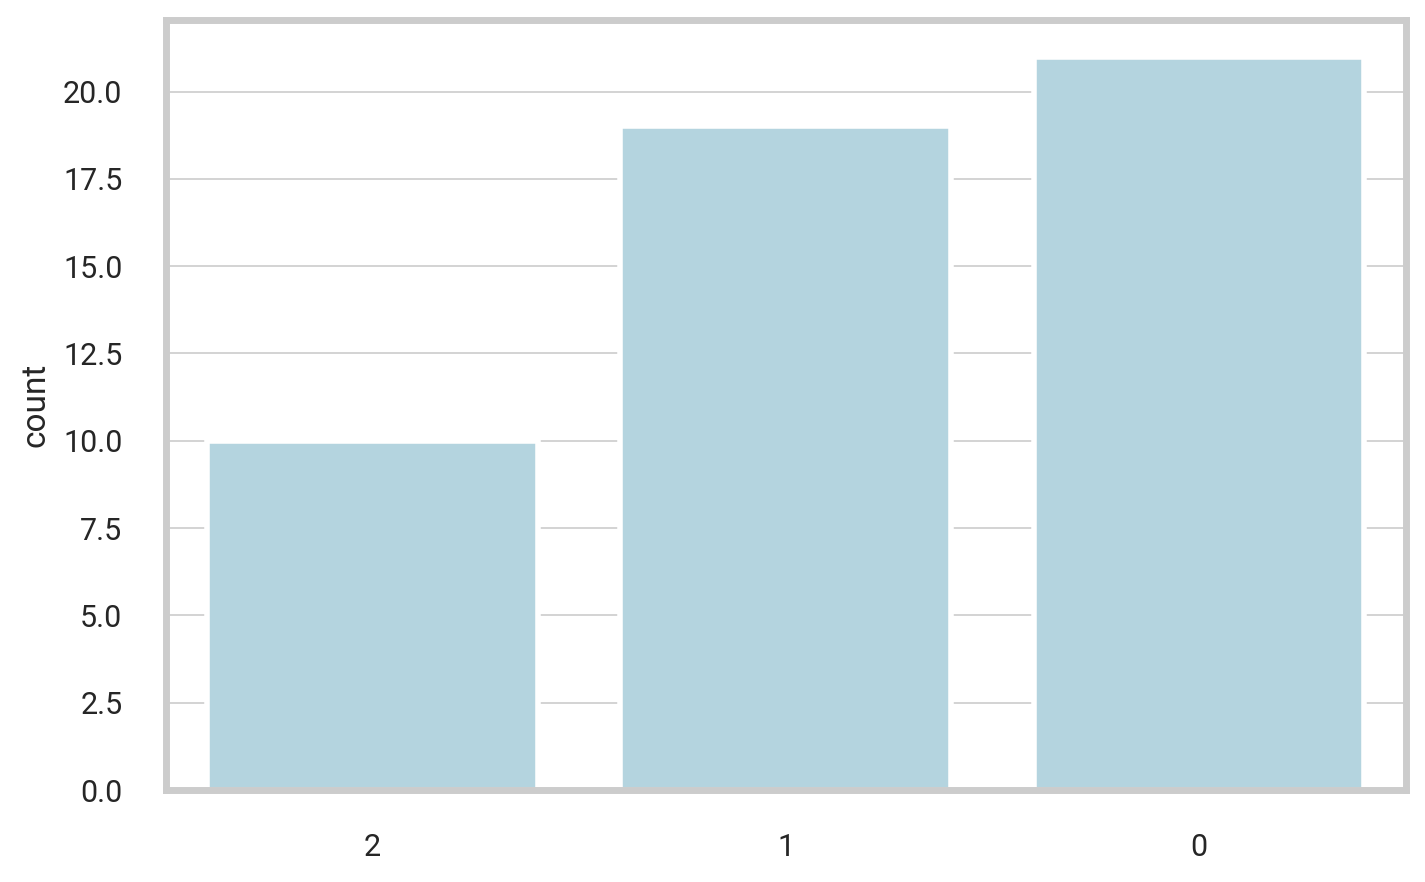

In [ ]:
sns.countplot(x=[str(group) for group in kmeans.labels_], color = 'lightblue')

#### Visualizing the Clusters


Moving forward, let's look at differences in the audio features of each group.



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(playlist_tracks.drop(['artist', 'name'], axis = 1))
scaled_data = scaler.transform(playlist_tracks.drop(['artist', 'name'], axis = 1))

Text(0, 0.5, 'PC2: 0.206')

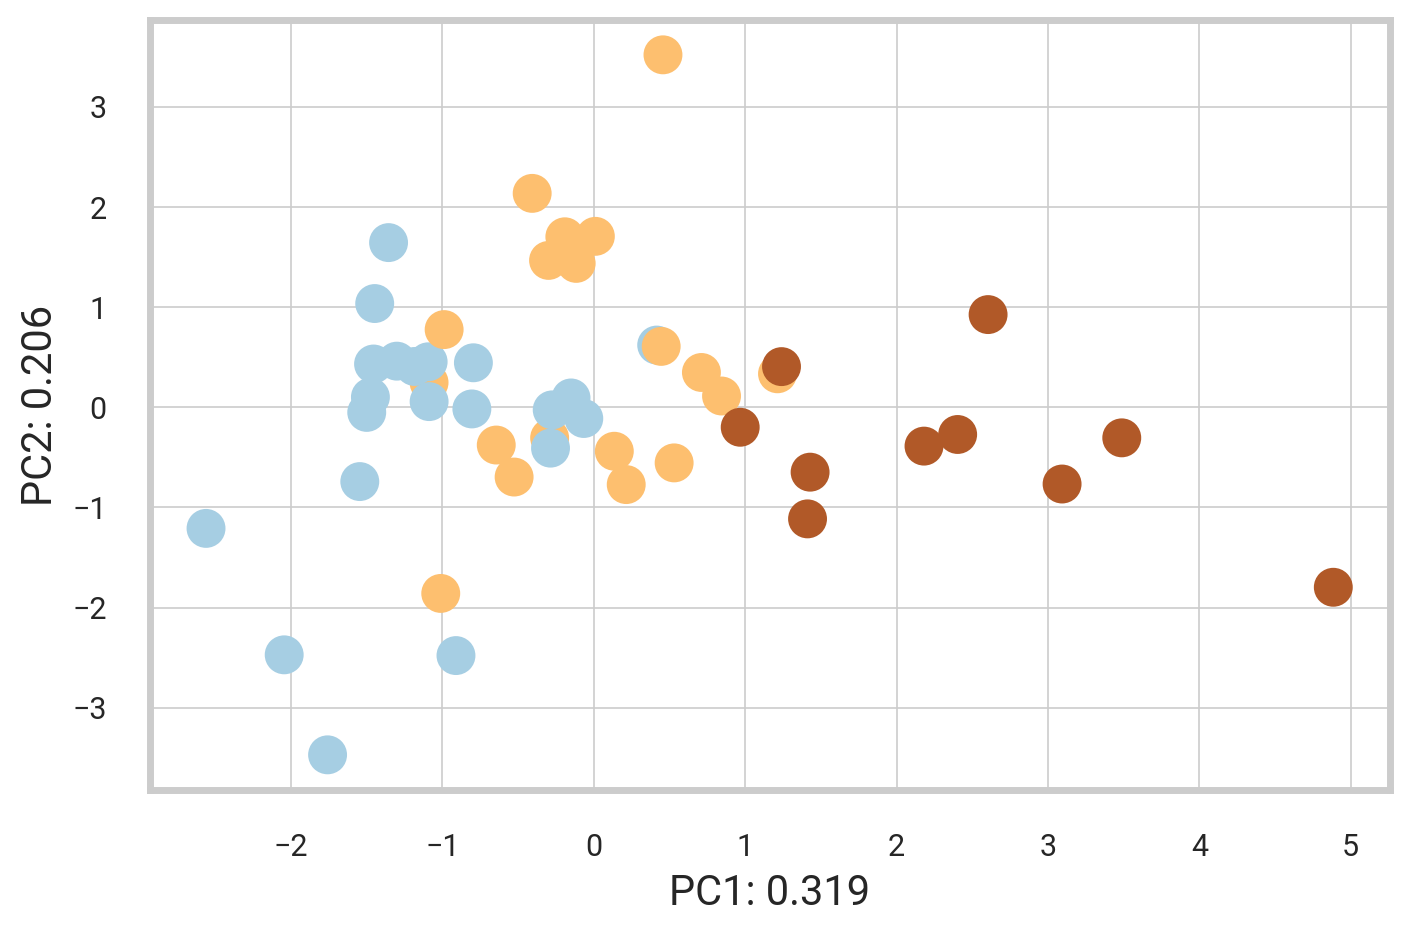

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

plt.scatter(data_pca[:,0], data_pca[:,1], c = list(kmeans.labels_), cmap = 'Paired')
plt.xlabel('PC1: {:.3f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.3f}'.format(pca.explained_variance_ratio_[1]), size = 15)

Text(0, 0.5, 'PC2: 0.206')

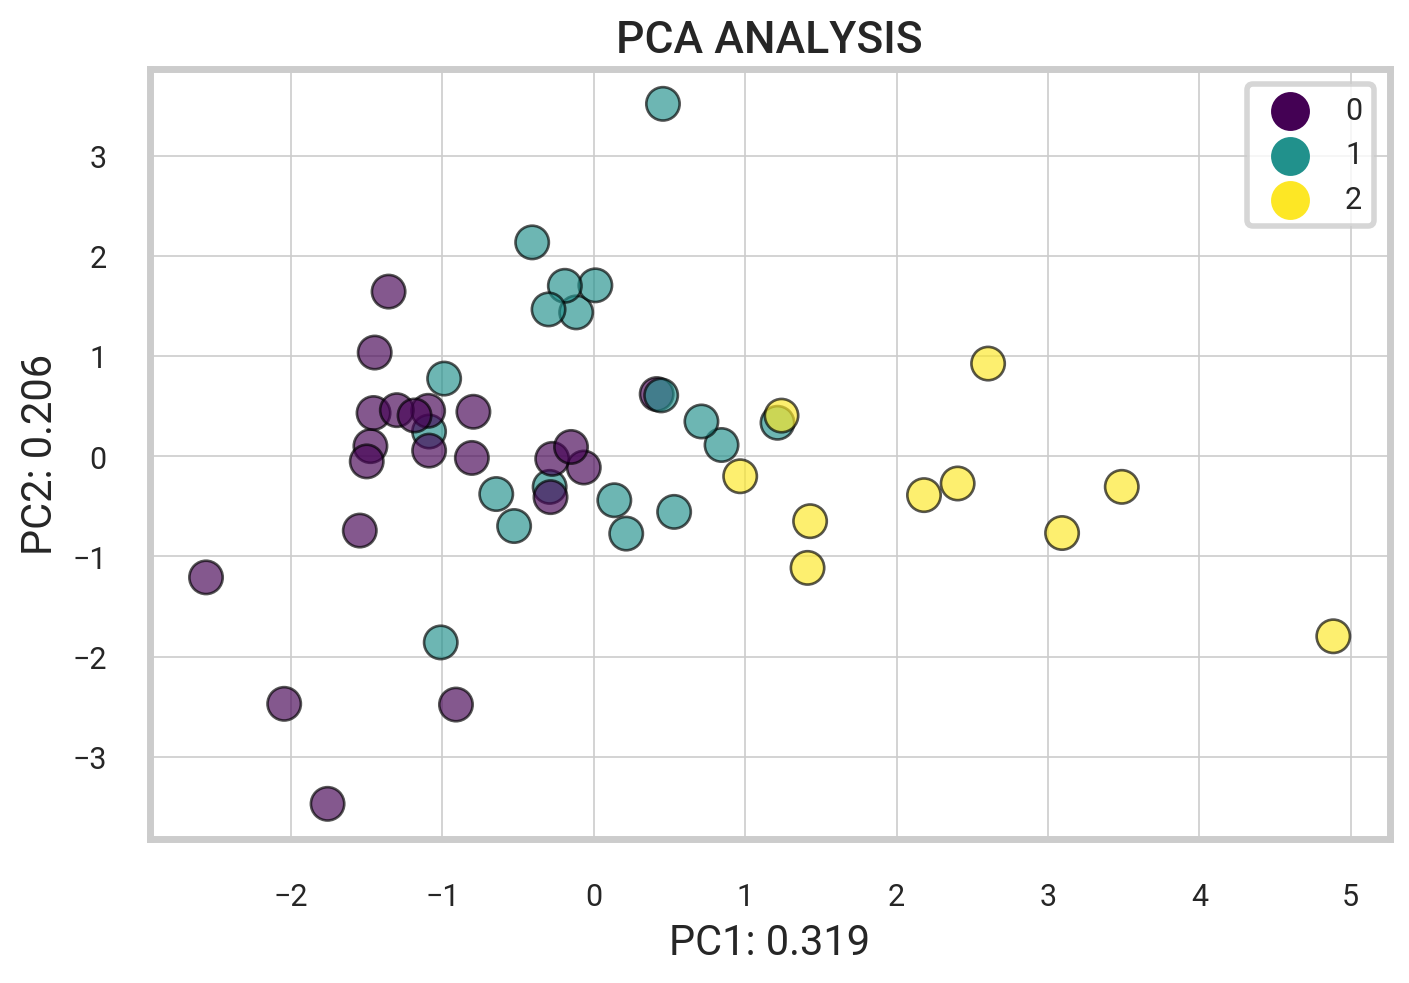

In [ ]:
plot = sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue = list(kmeans.labels_),
                       alpha = 0.66, 
                       #size = data_pca[:,1], sizes = (50,200),
                       palette = 'viridis', edgecolor = 'black', cmap='Paired')
plot.set_title('PCA ANALYSIS', size = 16, weight='bold')

plt.xlabel('PC1: {:.3f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.3f}'.format(pca.explained_variance_ratio_[1]), size = 15)


In [ ]:
playlist_tracks['group'] = list(kmeans.labels_)
playlist_tracks = playlist_tracks.astype({'group': str})

means = pd.DataFrame(index = range(0,3), 
                    columns = list(playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean'].index))
means.iloc[0] = playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean']
means.iloc[1] = playlist_tracks[playlist_tracks['group'] == '1'].describe().loc['mean']
means.iloc[2] = playlist_tracks[playlist_tracks['group'] == '2'].describe().loc['mean']
means

c:\Users\Hannah Luebbering\.conda\envs\cse160\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



acousticness danceability    energy  liveness instrumentalness speechiness  \
0     0.211471     0.738905  0.710381  0.182595         0.009162    0.089543   
1     0.121411     0.654211  0.700368  0.194463         0.044511    0.079705   
2       0.6363       0.5515   0.47261   0.13302         0.024815     0.04123   

    valence  
0  0.760476  
1  0.346205  
2    0.3029